In [8]:
import pandas as pd
df=pd.read_csv("/home/mansi/Desktop/internship/cognoRise_internship_task/task3/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
x=df.iloc[:,1:2].values
x


array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [53]:
y=df.iloc[:,0:1]
y

#converted in numeric category form 
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

y=lb.fit_transform(y)
y


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['Message'])
x

/home/mansi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [56]:
x_train  

<4457x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 59126 stored elements in Compressed Sparse Row format>

In [57]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
x_test

<1115x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 14972 stored elements in Compressed Sparse Row format>

In [59]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [32]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l

model=l.fit(x_train,y_train)
model

pred=model.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.979372197309417
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.98      0.87      0.92       155

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



[[957   3]
 [ 20 135]]


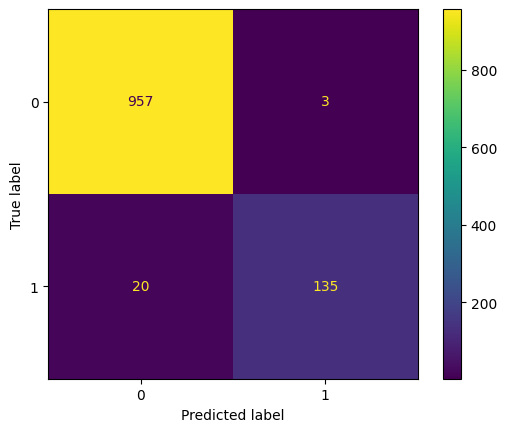

In [36]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()

In [38]:
#2.random forest classifier
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

model=r.fit(x_train,y_train)

pred=model.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.9748878923766816
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.97      1.00      0.99       960
           1       1.00      0.82      0.90       155

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



[[960   0]
 [ 28 127]]


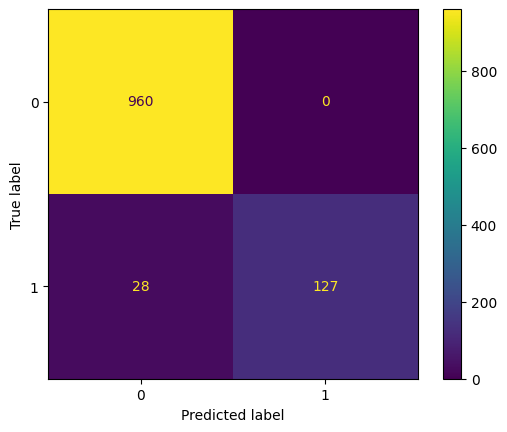

In [40]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()

In [45]:
#3.adaboosting classifier
from sklearn.ensemble import AdaBoostClassifier
a=AdaBoostClassifier()
a

model=a.fit(x_train,y_train)
model

pred=model.predict(x_test)
pred

array([1, 0, 0, ..., 1, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.9632286995515695
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.97      0.99      0.98       960
           1       0.95      0.78      0.86       155

    accuracy                           0.96      1115
   macro avg       0.96      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115



[[953   7]
 [ 34 121]]


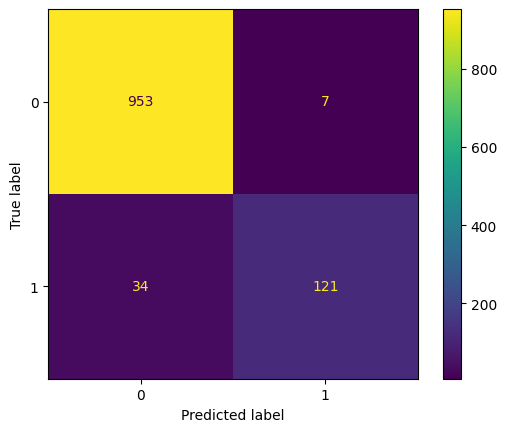

In [47]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()

In [49]:
#4.knn

from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

model=k.fit(x_train,y_train) 
pred=model.predict(x_test) 
print("predicted values is ",pred)


predicted values is  [1 0 1 ... 0 0 0]


In [50]:
from sklearn.metrics import accuracy_score,classification_report

print("accuracy score is ",accuracy_score(y_test,pred))
print("classfication-report  is : \n \n ",classification_report(y_test,pred))

accuracy score is  0.9165919282511211
classfication-report  is : 
 
                precision    recall  f1-score   support

           0       0.91      1.00      0.95       960
           1       1.00      0.40      0.57       155

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.92      0.92      0.90      1115



[[960   0]
 [ 93  62]]


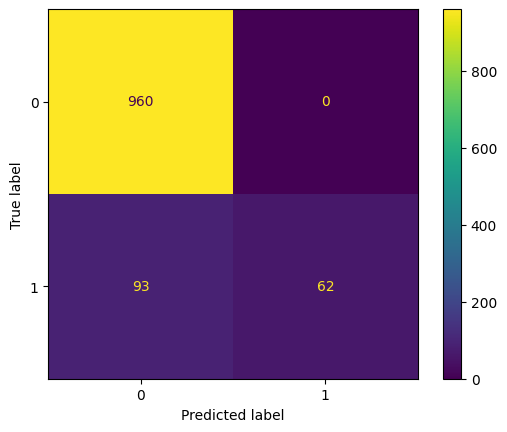

In [51]:
#ploting the values

#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
c=confusion_matrix(y_test,pred)
print(c)

cmat=ConfusionMatrixDisplay(confusion_matrix=c)
cmat.plot()